## Telco Churning Project using Machine Learning

This project will utilize the CRISP-DM framework for its analysis

## Business Understanding



Using the provided dataset, a business could gain insights into the factors that influence customer churn. For example, analyzing customer demographics (e.g., gender, SeniorCitizen status) could reveal if certain groups are more likely to churn, allowing the company to tailor retention efforts to those groups. Understanding the impact of services (e.g., PhoneService, InternetService) on churn could help in improving service quality or offering promotions to retain customers.

Furthermore, analyzing contract terms (e.g., Contract length, PaperlessBilling) and payment methods could provide insights into the effectiveness of different billing strategies in retaining customers. By identifying these factors and their impact on churn, businesses can develop targeted retention strategies, such as personalized offers, loyalty programs, or improved customer service, to reduce churn and increase customer loyalty.

Null Hypothesis 
- There is no significant relationship between the customer features (services subscribed, contract terms, payment methods) and customer churn.

Alternate Hypothesis
- There is a significant relationship between the customer features and customer churn.

Analytical Questions

1. What is the churn rate among different demographic groups (e.g., gender, SeniorCitizen status)?

2. How does the tenure of a customer affect their likelihood to churn?

3. Are customers with certain services (e.g., PhoneService, InternetService) more likely to churn?

4. How do contract terms (e.g., Contract length, PaperlessBilling) influence churn?

5. What role do payment methods play in customer churn?

Data Extraction

In [37]:
## importing the necessary libraries
#%pip install pyodbc python-dotenv 

import pyodbc    
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [27]:

# Create a connection string to extract first 3000 rows from SQL server
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
try:
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()
    print('Connection established successfully.')
except Exception as e:
    print(f'Error connecting to the database: {e}')


Connection established successfully.


In [28]:
## loading of the first 3000 rows of dataset
query = "Select * from dbo.LP2_Telco_churn_first_3000"

data3000 = pd.read_sql(query, conn)
data3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [29]:
## saving the first 3000 as csv
data3000.to_csv("churnfirst3000.csv", index=False)

In [30]:
## checking the second 2000rows of the dataset
data2000 = pd.read_csv('../Dataset/LP2_Telco-churn-second-2000.csv')
data2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


Data Understanding

In [106]:
## Merging both datasets before analyzing
df = pd.concat([data3000, data2000], axis=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [66]:
##check the tail
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
2042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [32]:
## checking the number of entries in the entire dataset and the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [33]:
##checking for null valuess
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [34]:
## checking for duplicates
df.duplicated().value_counts()

False    5043
Name: count, dtype: int64

In [67]:
## checking uniques 
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4863
Churn                  4
dtype: int64

In [69]:
## decriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


Observations
- We can see from the mean and medians that our data is not normally distributed since the mean and median arent really close
- On the average, Total Charges is around 2,302
- On the average, Monthly charges is around 65

Exploratory Data Analysis


In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric with errors set to 'coerce'


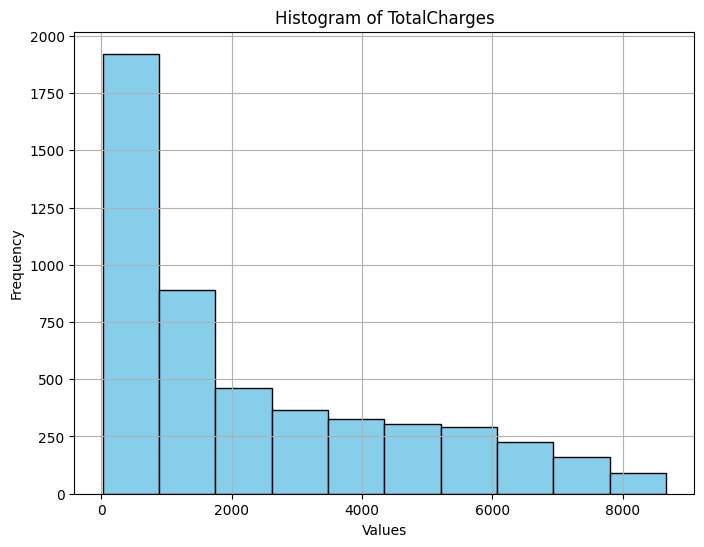

ValueError: cannot reindex on an axis with duplicate labels

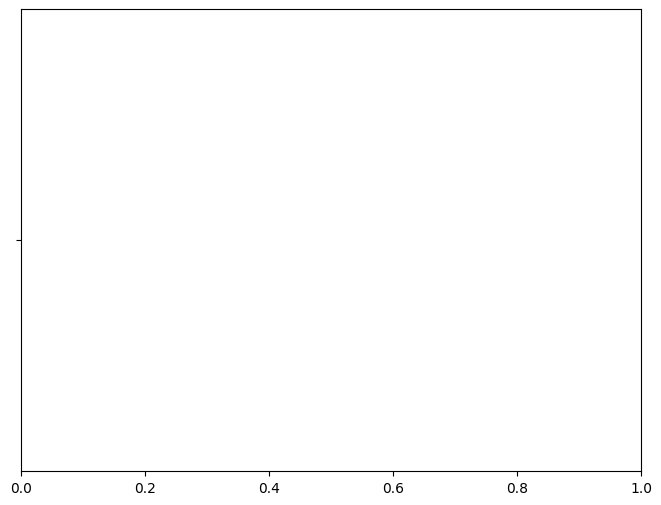

In [61]:
# Create a histogram for TotalCharges
plt.figure(figsize=(8, 6))
plt.hist(df['TotalCharges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of TotalCharges')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for TotalCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'], color='lightgreen', orient='v')
plt.title('Boxplot of TotalCharges')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

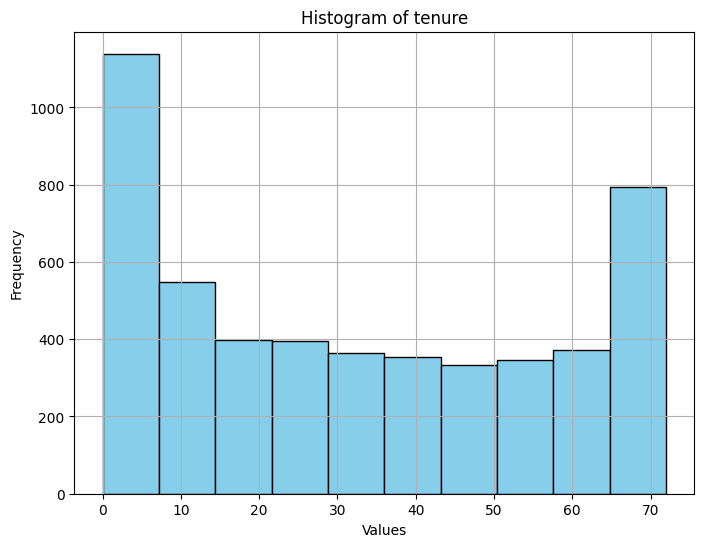

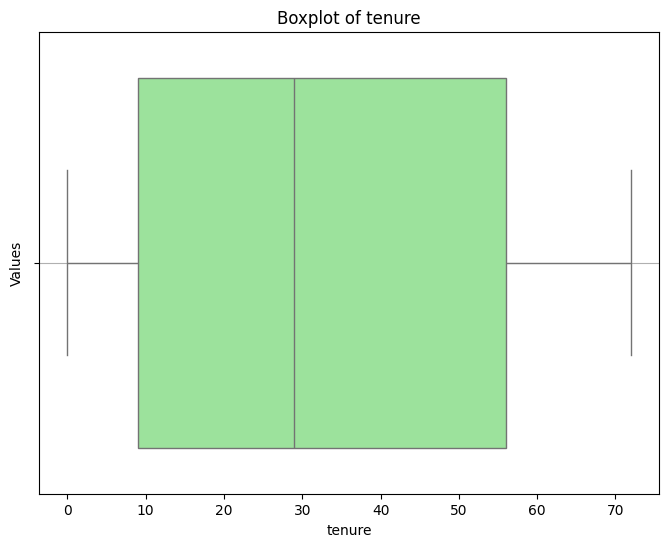

In [38]:
# Create a histogram for tenure
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of tenure')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'], color='lightgreen', orient='v')
plt.title('Boxplot of tenure')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()


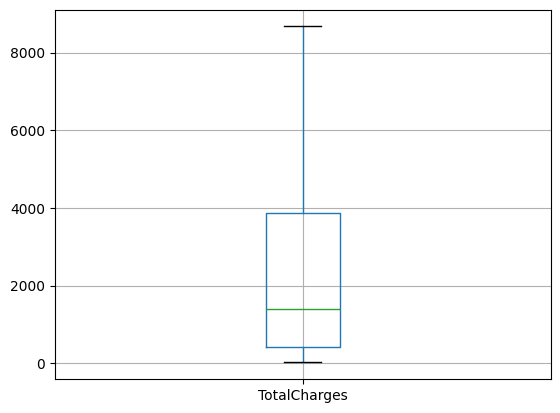

In [70]:
## checking the distribution in the Total charges
df.boxplot(column='TotalCharges')
plt.show()

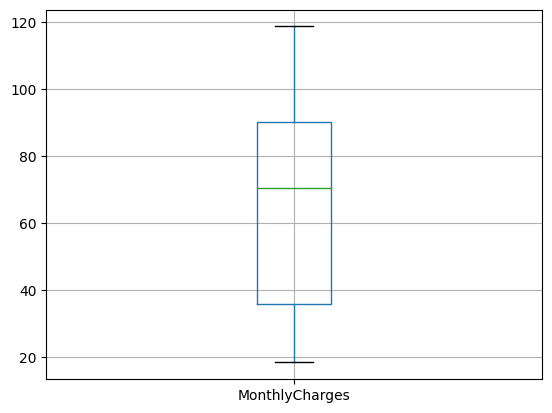

In [71]:
## visualizing the distribution of monthly charges
df.boxplot(column='MonthlyCharges')
plt.show()

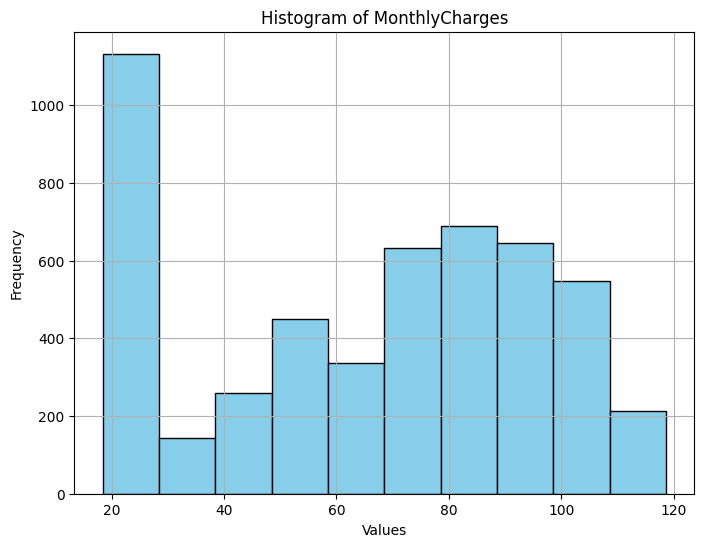

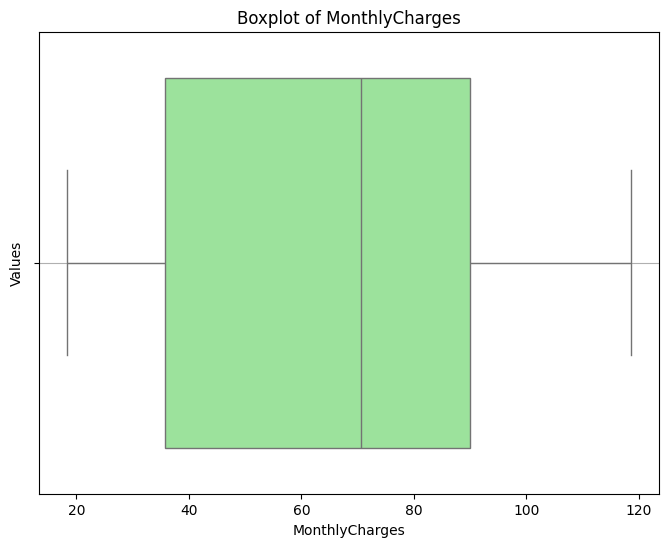

In [40]:
# Create a histogram for MonthlyCharges
plt.figure(figsize=(8, 6))
plt.hist(df['MonthlyCharges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of MonthlyCharges')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'], color='lightgreen', orient='v')
plt.title('Boxplot of MonthlyCharges')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

In [ ]:
## Analyzing the Categorical Variables

ValueError: cannot reindex on an axis with duplicate labels

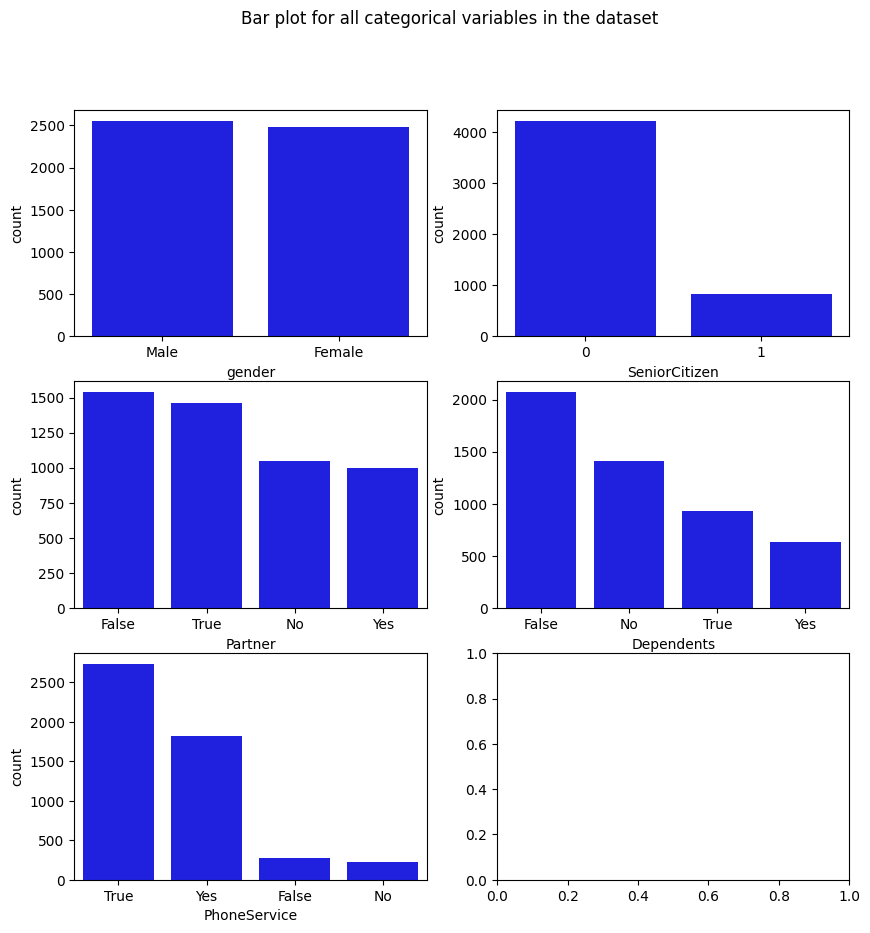

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax=axes[0, 0], x='gender', data=df, color='blue', order=df['gender'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='SeniorCitizen', data=df, color='blue', order=df['SeniorCitizen'].value_counts().index)
sns.countplot(ax=axes[1, 0], x='Partner', data=df, color='blue', order=df['Partner'].value_counts().index)
sns.countplot(ax=axes[1, 1], x='Dependents', data=df, color='blue', order=df['Dependents'].value_counts().index)
sns.countplot(ax=axes[2, 0], x='PhoneService', data=df, color='blue', order=df['PhoneService'].value_counts().index)
sns.countplot(ax=axes[2, 1], x='MultipleLines', data=df, color='blue', order=df['MultipleLines'].value_counts().index)

axes[1, 1].tick_params(axis='x', labelrotation=45)
axes[2, 0].tick_params(axis='x', labelrotation=90)
axes[2, 1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()


In [82]:

df["Dependents"].unique()

array([False, True, 'No', 'Yes'], dtype=object)

In [84]:
df["PhoneService"].unique()

array([False, True, 'Yes', 'No'], dtype=object)

In [89]:
df["Partner"].unique()

array([True, False, 'No', 'Yes'], dtype=object)

In [107]:
def map_to_boolean(df):
    df["Partner"] = df["Partner"].map({True: "Yes", False: "No"})
    df["PhoneService"] = df["PhoneService"].map({True: "Yes", False: "No"})
    df["Dependents"] = df["Dependents"].map({True: "Yes", False: "No"})

    return df

# Example usage
df = map_to_boolean(df)

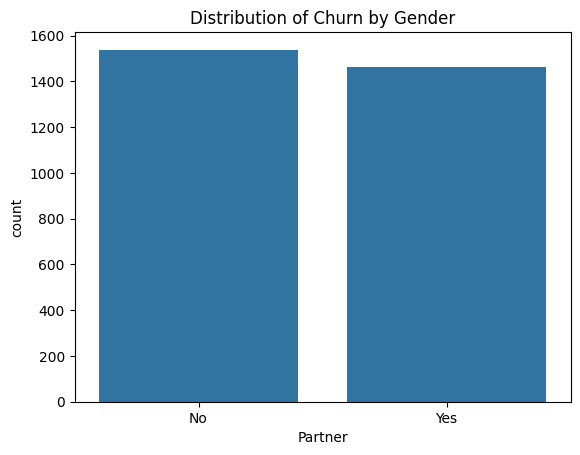

In [112]:
## 
sns.barplot(df["Partner"].value_counts())
plt.title("Distribution of Churn by Gender")
plt.show()

In [104]:
df["Dependents"].unique()

array(['No', 'Yes', nan], dtype=object)